In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

## Step 1: Generating mandelbrot set

In [2]:
def mandelbrot(dx , nmax , xbounds=(-2.25 , 1), ybounds= (-1.5,1.5)):
    x1, x2 = xbounds
    y1, y2 = ybounds
    xs = np.arange(x1, x2 + dx, dx)
    ys = np.arange(y1, y2 + dx, dx)
    coordinates = [(x,y) for x in xs for y in ys]
    mandelbrot = []
  
    for coordinate in coordinates:
        c = complex(coordinate[0], coordinate[1])
        zn_1 = 0
        height = 0
        
        for iteration in range(nmax):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        term = (c.real, c.imag , height) 
        mandelbrot.append(term)

    return np.array(mandelbrot)

    

 #### Visualizing

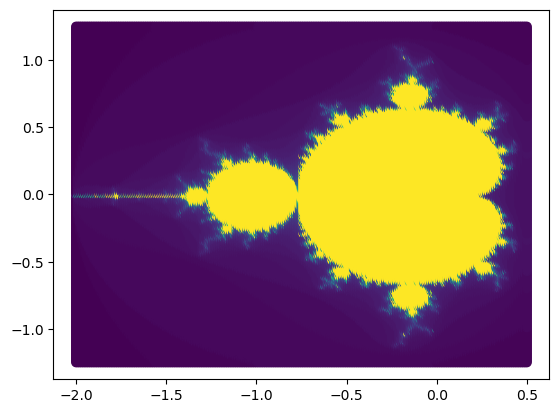

In [3]:

dx = 0.01
xrange = (-2, 0.5)
yrange = (-1.25,1.25)
nmax = 100


#sety = mandelbrot( dx=dx ,nmax = nmax)
sety = mandelbrot(dx ,nmax, xrange, yrange)

x, y , c = sety[:, 0], sety[:, 1], sety[:,2]


plt.scatter(x,y, c=c)


In [18]:
def MonteCarlo(iterations, samples, xlen, ylen):
    counter = 0
    sample_set = []
    for sample in range(samples):
        coordinate = [np.random.uniform(xlen[0], xlen[1]), np.random.uniform(ylen[0], ylen[1])]
        c = complex(coordinate[0], coordinate[1])
        zn_1 = 0
        height = 0
        for iteration in range(iterations):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        if height >= iterations: 
            counter += 1
        term = (c.real, c.imag , height) 
        sample_set.append(term)
    A_m = (counter / samples) * ((xlen[1]-xlen[0]) * (ylen[1]-ylen[0]))
    return A_m

Area = MonteCarlo(100, 10000, xrange, yrange)
print(Area)

1.5474999999999999


In [19]:
def Convergence(iteration_max, sample_size, xrange, yrange):
    Res = np.empty((iteration_max, 1))
    Data_final = MonteCarlo(iteration_max, 10_000, xrange, yrange) 
    for i in range(iteration_max):
        Integral_var = MonteCarlo(i, sample_size, xrange, yrange)
        Res[i] = abs(Integral_var - Data_final)
    return Res

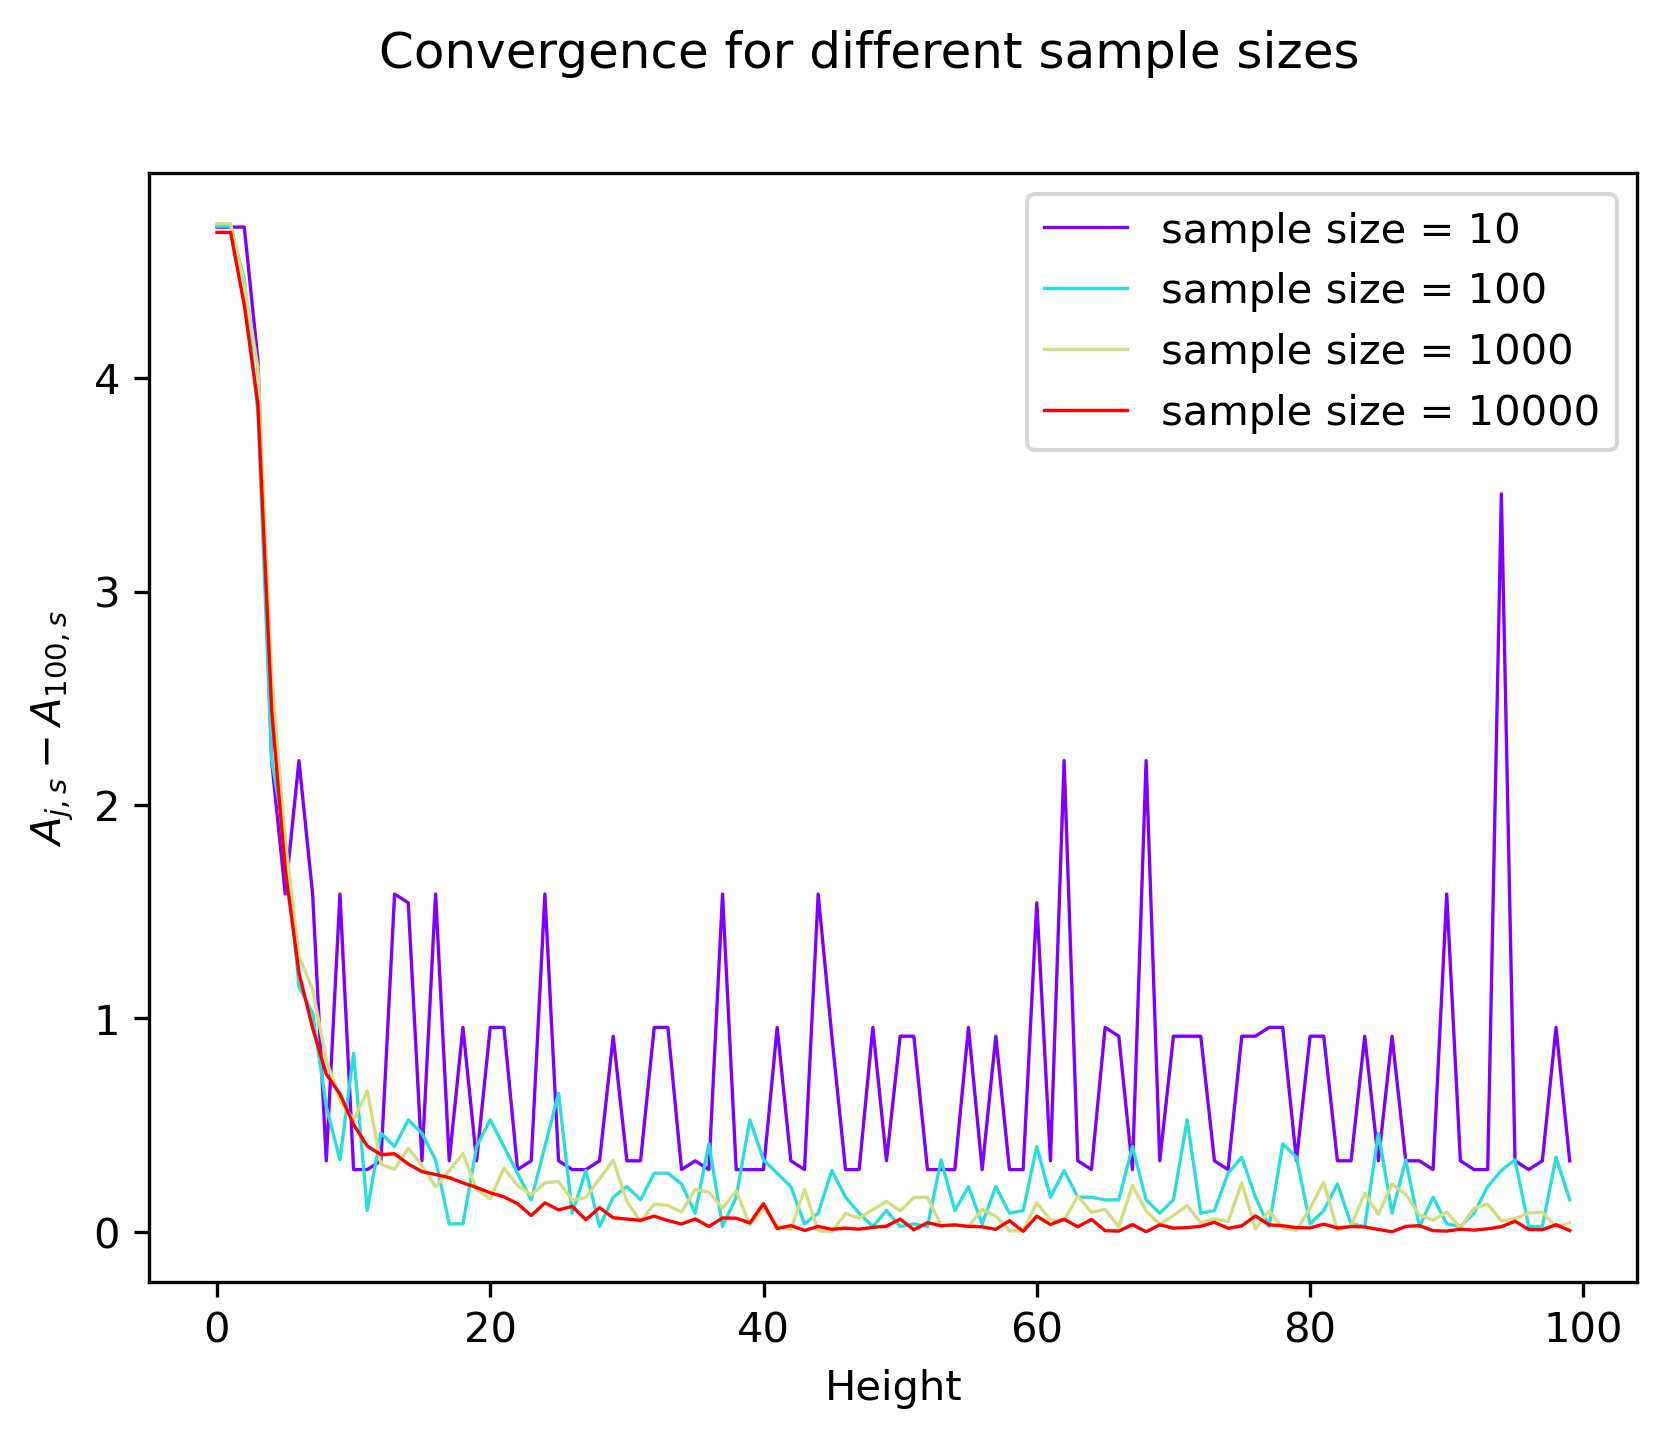

In [20]:
from matplotlib.pyplot import cm

iteration_max = 100
nsamples = [10, 100, 1000, 10000] 
sample_res = []

for s in nsamples:
    Convergence_res = Convergence(iteration_max, s, xrange, yrange)
    sample_res.append(Convergence_res)

# maybe take absolute values for convergence --> otherwise fluctuations
plt.figure(dpi = 300)
color = iter(cm.rainbow(np.linspace(0, 1, len(nsamples))))
for index in range(len(nsamples)):
    col = next(color)
    plt.plot(sample_res[index], c = col, linewidth = '0.8', label = 'sample size = {}'.format(nsamples[index]))
plt.legend()
plt.xlabel('Height')
plt.ylabel(r'$A_{j,s}-A_{100,s}$')
plt.suptitle('Convergence for different sample sizes')
plt.show()
plt.close()



In [44]:
def Confidence_interval(confidence, iterations_CI, iteration_integration, sample_size, xrange, yrange):
    Confidence_arr = []
    for iter_CI in range(iterations_CI):
        Integral = MonteCarlo(iteration_integration, sample_size, xrange, yrange)
        Confidence_arr.append(Integral)
    Mean = np.mean(Confidence_arr)
    S2 = []
    for iters in range(iterations_CI):
        S2.append((Confidence_arr[iters]-Mean)**2)
    s = np.sqrt((1/iterations_CI)*sum(S2))
    x_neg = Mean - ((confidence*s)/np.sqrt(iterations_CI))
    x_pos = Mean + ((confidence*s)/np.sqrt(iterations_CI))
    return [Mean, x_neg, x_pos]

Con = Confidence_interval(1.96, 50, 100, 10000, xrange, yrange)
print(Con)

[1.5332500000000002, 1.5266415365628614, 1.539858463437139]


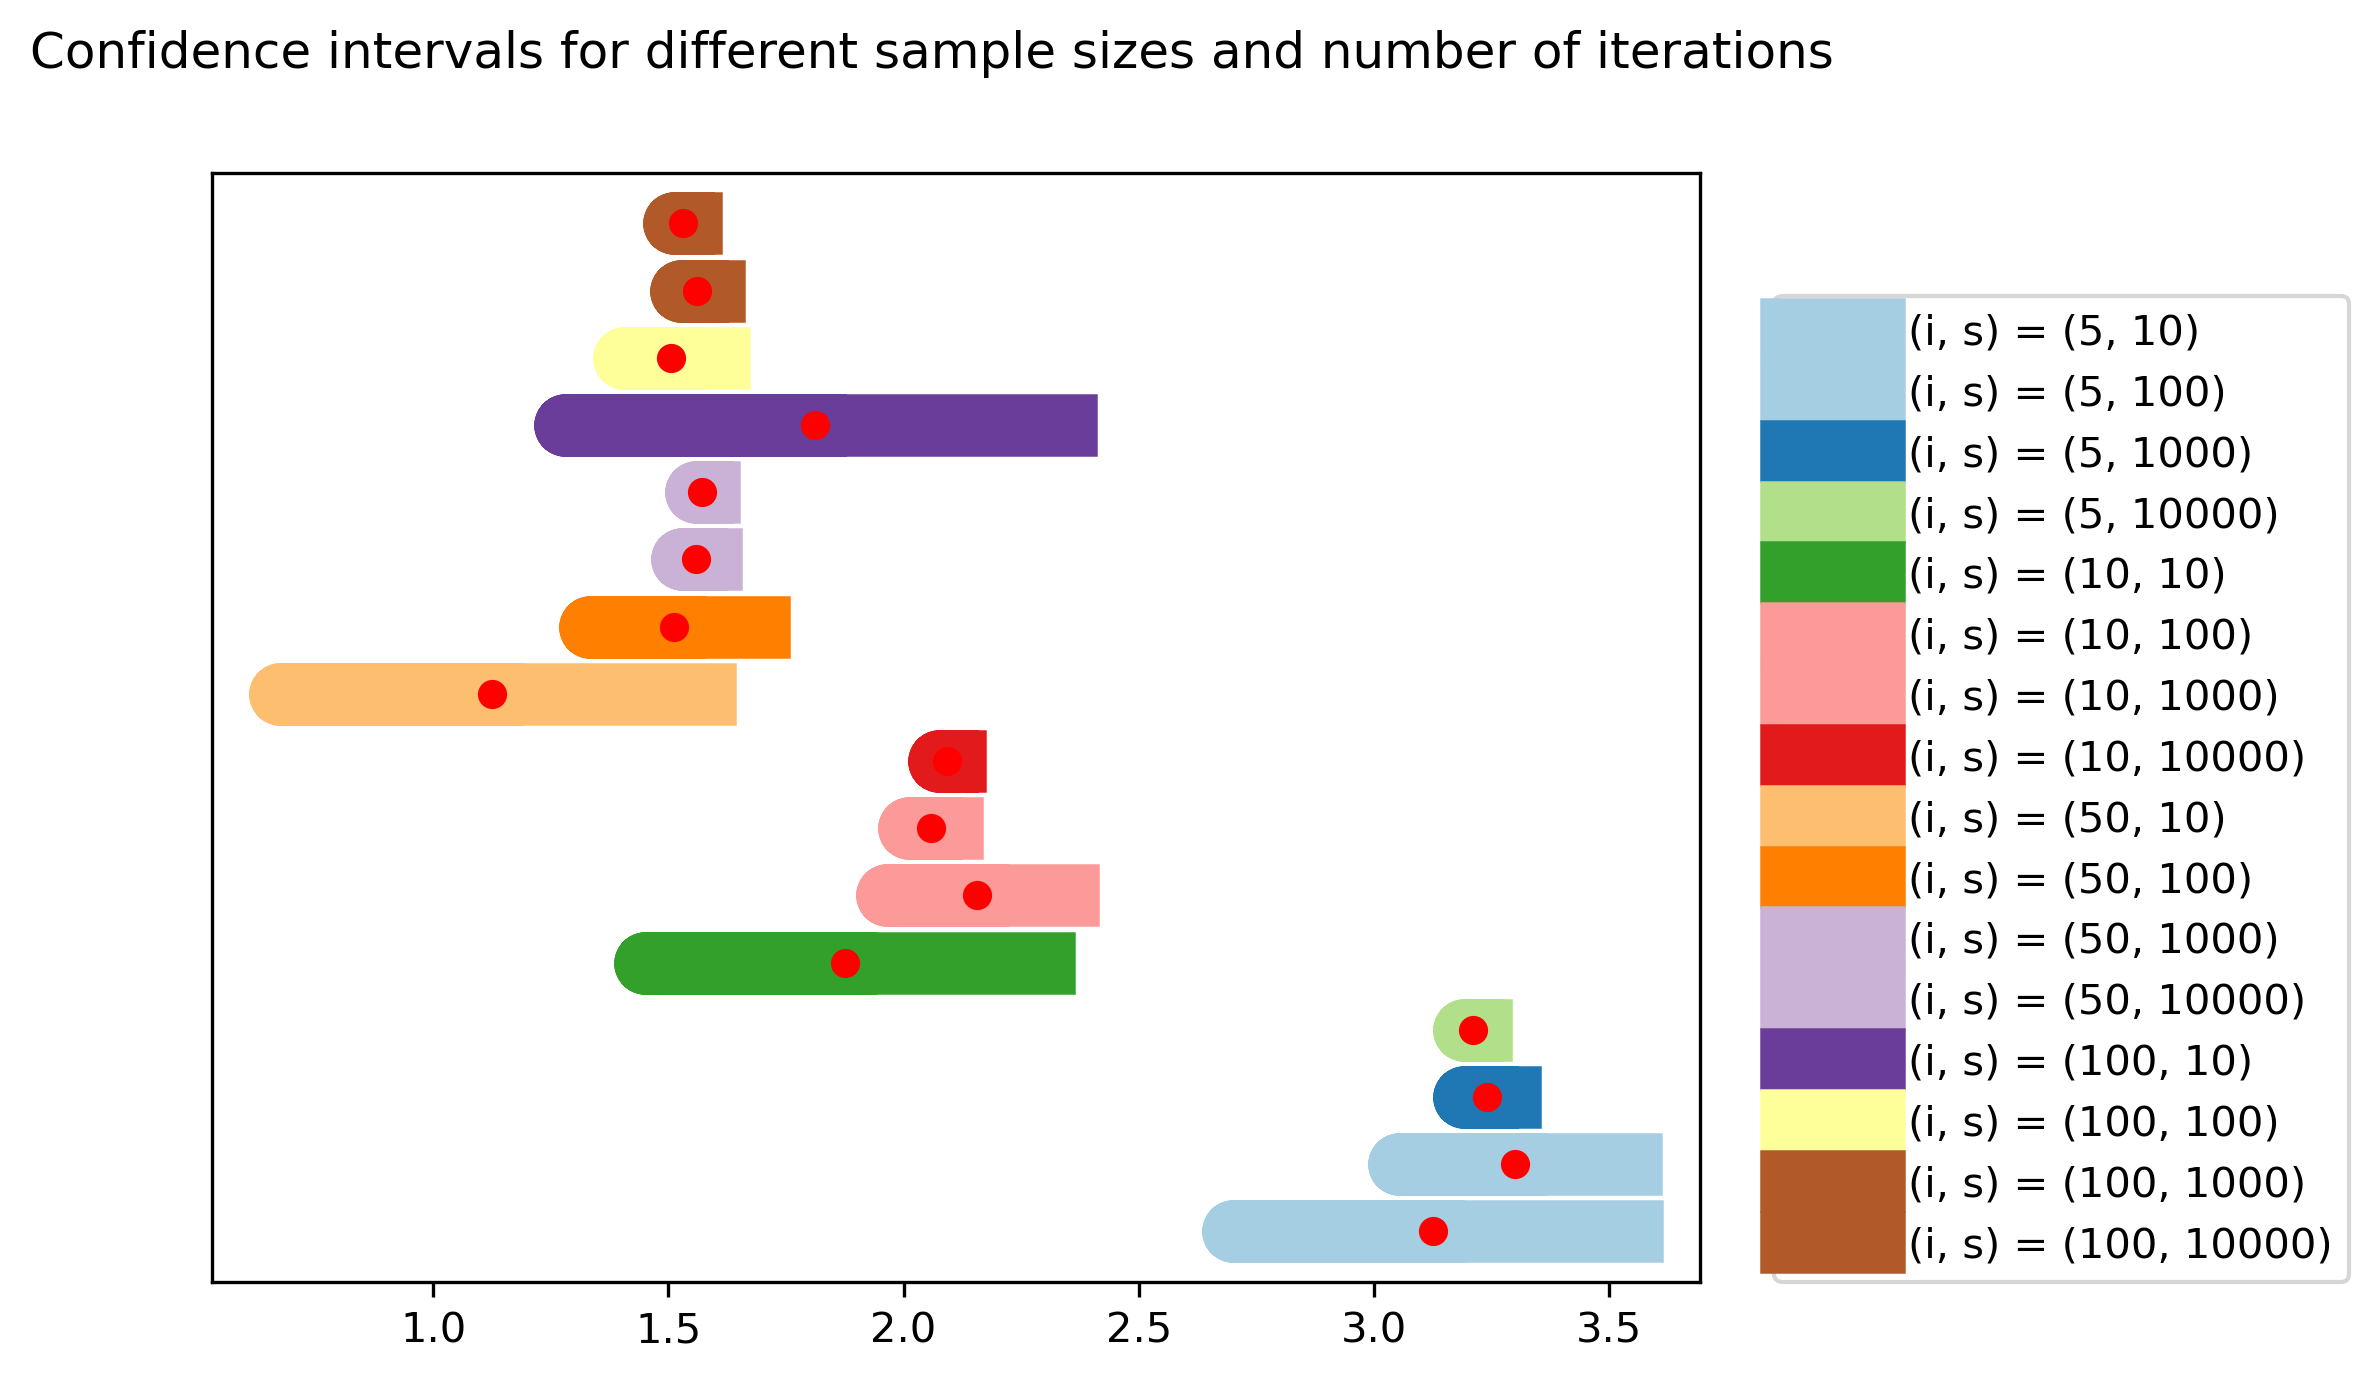

In [45]:
iterations_CI = 10
confidence = 1.96 # this equals a 95% confidence interval
sample_sizes = [10, 100, 1000, 10000]
niters = [5, 10, 50, 100]
Result_arr = []

for iters in niters:
    for samples in sample_sizes: 
        Interval = Confidence_interval(confidence, iterations_CI, iters, samples, xrange, yrange)
        length = Interval[2] - Interval[1]
        Result = [iters, samples, Interval[0], Interval[1], Interval[2], length]
        Result_arr.append(Result)
Array = Result_arr

def array_form(length):
    array_f = []
    for n in range(0,length):
        arr = [n/10000]*3
        array_f.append(arr)
    return np.array(array_f)

y = array_form(len(Array))
plt.figure(dpi = 300)
color = iter(cm.Paired(np.linspace(0, 1, len(Array))))
for i in range(len(Array)):
    col0 = next(color)
    Store = [Array[i][2], Array[i][3], Array[i][4]]
    y_ax = y[i,:]
    plt.scatter(Store[0], y_ax[0], color = 'r', zorder=2)
    plt.plot(Store, y_ax, c = col0, linewidth = '15', zorder=1, label = '(i, s) = {}'.format((Array[i][0], Array[i][1])))
plt.yticks([])
plt.legend(loc = (1.05, 0))
plt.suptitle('Confidence intervals for different sample sizes and number of iterations')
plt.show()
plt.close()

## Question 3: Comparison of different sampling techniques

### Latin hypercube sampling

In [6]:
#Latin hypercube sampling
    
def intervals(arr): #Returns a list of tuples for each interval of a list

    intervals = [] # A list of tuples containing each interval for the given range      
    for i in range(len(arr)):
        j = i +1
        if(j < len(arr)):
            interval = (arr[i],arr[j])
            intervals.append(interval)

    return intervals  

      
def shuffler(x,y): #Shuffles the position of the x and y intervals in their respective lists
 
      
      shuffled_x_intervals = random.sample(x, len(x))
      shuffled_y_intervals = random.sample(y, len(y))

      return[shuffled_x_intervals,shuffled_y_intervals]


def latin_hypercube_sample(n): #Returns a list of randomly sampled n complex numbers from each row of the grid


        xrange = np.linspace(-2,0.5,n+1) #x range in grid, with step n+1
    
        yrange = np.linspace(-1.25,1.25,n+1) #y range in grid, with step n+1

        x_intervals_list = intervals(xrange) #A list in which each element is one of the intervals in the x range

        y_intervals_list = intervals(yrange) #A list in which each element is one of the intervals in the y range
        
        #print("X INTERVALS")
        #print(x_intervals_list)
        ##print("Y INTERVALS")
        #print(y_intervals_list)
        
        shuffled_x_intervals, shuffled_y_intervals  = shuffler(x_intervals_list,y_intervals_list) #Shuffling the intervals of both lists
        
        random_x_list = [] #A list of random numbers chosen uniformly from each interval of the shuffled x intervals
        random_y_list = [] #A list of random numbers chosen uniformly from each interval of the shuffled y intervals

        for interval in shuffled_x_intervals:
                
                random_x = random.uniform(interval[0],interval[1])
                random_x_list.append(random_x)


        for interval in shuffled_y_intervals:

                random_y = random.uniform(interval[0],interval[1])
                random_y_list.append(random_y)

        
        coordinates = list(zip(random_x_list, random_y_list))  
        

        random_complex_numbers = []

        for coordinate in coordinates:
                c = complex(coordinate[0], coordinate[1])
                random_complex_numbers.append(c)


        return[random_complex_numbers]



In [7]:

#GET HEIGHTS FOR LATIN HYPERCUBE SAMPLE
latin_list = latin_hypercube_sample(1000)
#print(len(mandelbrot_dictionary))
#print(mandelbrot_dictionary['(-2-1.25j)'])

heights = []

for number in latin_list[0]:
        c = number
        zn_1 = 0
        height = 0
        
        for iteration in range(nmax):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        heights.append(height)
        


In [8]:
#Calculate new Area with latin hypercube sampling
counter = 0
for height in heights:
    Random_Point = height
    if Random_Point >= 100:
            counter = counter + 1
A_m = (counter / len(heights)) * (2.5) * 2.5
print(A_m)
#Area = MonteCarlo(1000, 10000, xrange, yrange)
#print(Area)


1.4812500000000002


### Orthogonal sampling

In [9]:
#Orthogonal sampling

def orthogonal_shuffler(x,y,n): #Shuffles the position of the x and y intervals in a quadrant
      
            
            shuffled_x_intervals = random.sample(x, n) #We only draw n intervals, where n is the number of values we want to pick from each quadrant
            shuffled_y_intervals = random.sample(y, n)

            return[shuffled_x_intervals,shuffled_y_intervals]

def orthogonal_sampling(n):

      samples_per_quadrant = int(n/4) #Working out the nunber of samples per quadrant 

      xrange = np.linspace(-2,0.5,n+1) #x range in grid, with step n+1
      
      yrange = np.linspace(-1.25,1.25,n+1) #y range in grid, with step n+1

      x_intervals_list = intervals(xrange) #A list in which each element is one of the intervals in the x range

      y_intervals_list = intervals(yrange)#A list in which each element is one of the intervals in the y range

      midpoint = int(len(x_intervals_list)/2) #Both x and y lists have the same length, and hence the same mid point
      x_halves = [[x_intervals_list[:midpoint]],[x_intervals_list[midpoint:]]] #slicing the x intervals in half
      y_halves = [[y_intervals_list[:midpoint]],[y_intervals_list[midpoint:]]] #Slicing the y intervals in half

      quadrant1 = [x_halves[0],y_halves[0]] #Bottom left square
      quadrant2 = [x_halves[0],y_halves[1]] #Top left square
      quadrant3 = [x_halves[1],y_halves[0]] #Bottom right square
      quadrant4 = [x_halves[1],y_halves[1]] #Top right square

      quadrants = [quadrant1,quadrant2,quadrant3,quadrant4]

      orthogonal_sample = [] #Stores all the complex numbers for the Orthogonal sample
      x_interval_bin = [] #A list that stores previously used x intervals so that values in these intervals can't be selected in other quadrants
      y_interval_bin = [] #A list that stores previously used y intervals so that values in these intervals can't be selected in other quadrants



      for quadrant in quadrants:
      
            x_intervals = quadrant[0][0] #Extracting the x intervals of this quadrant
            y_intervals = quadrant[1][0] #Extracting the y intervals of this quadrant

            x_intervals = [x for x in x_intervals if x not in x_interval_bin]
            y_intervals = [y for y in y_intervals if y not in y_interval_bin]    
                        
            #print(x_intervals)
            shuffled_x_intervals, shuffled_y_intervals  = orthogonal_shuffler(x_intervals,y_intervals,samples_per_quadrant) #Shuffling the x and y intervals of this quadrant 
            random_x_list = []
            random_y_list = []

            #print(shuffled_x_intervals)
            

            for interval in shuffled_x_intervals:
                  
                        x_interval_bin.append(interval) #Add these x intervals to the bin, we don't want to use them again

                        random_x = random.uniform(interval[0],interval[1])
                        random_x_list.append(random_x)

            for interval in shuffled_y_intervals:

                        y_interval_bin.append(interval) #Add these y intervals to the bin, we don't want to use them again
                        random_y = random.uniform(interval[0],interval[1])
                        random_y_list.append(random_y)

            #print("x BIN")
            #print(x_interval_bin)
            #print("y bin")
            #print(y_interval_bin)
            coordinates = list(zip(random_x_list, random_y_list))  
                  

            for coordinate in coordinates:
                        c = complex(coordinate[0], coordinate[1])
                        orthogonal_sample.append(c)
                        
      return [orthogonal_sample]


In [10]:
##GET HEIGHTS FOR ORTHOGONAL SAMPLE

orthogonal_sample = orthogonal_sampling(1000)

orthogonal_heights = []

for number in orthogonal_sample[0]:
        c = number
        zn_1 = 0
        orthogonal_height = 0
        
        for iteration in range(nmax):
            orthogonal_height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        orthogonal_heights.append(orthogonal_height)
        

In [11]:
#Calculate new Area with orthogonal sample
counter = 0
for height in orthogonal_heights:
    Random_Point = height
    if Random_Point >= 100:
            counter = counter + 1
A_m = (counter / len(orthogonal_heights)) * (2.5) * 2.5
print(A_m)
#Area = MonteCarlo(1000, 10000, xrange, yrange)
#print(Area)

1.49375


### Confidence Intervals for different sampling methods

In [35]:
#METHODS REQUIRED TO GENERATE MULTIPLE AREA ESTIMATES

def calculate_heights(complex_numbers):
    
    heights = []

    for number in complex_numbers:
        c = number
        zn_1 = 0
        height = 0
        
        for iteration in range(nmax):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        heights.append(height)
        
    return heights
        
    
def calculate_area(heights):

    counter = 0
    for height in heights:
        Random_Point = height
        if Random_Point >= 100:
            counter = counter + 1
    A_m = (counter / len(heights)) * (2.5) * 2.5

    return A_m

    



In [37]:
#Generate multiple areas using latin sampling

areas_latin = []

for i in range(100):

    latin_list = latin_hypercube_sample(100)

    heights = calculate_heights(latin_list[0])

    area = calculate_area(heights)

    areas_latin.append(area)

print(areas_latin)

[1.5625, 1.5, 1.8125, 1.4375000000000002, 1.5625, 1.5625, 1.5, 1.6875, 1.4375000000000002, 1.5, 1.3125, 1.1875, 1.9375, 1.375, 1.7500000000000002, 1.4375000000000002, 1.375, 1.625, 1.4375000000000002, 1.5625, 1.7500000000000002, 1.1875, 1.625, 1.7500000000000002, 2.0, 1.5625, 1.625, 1.25, 1.375, 1.5625, 1.5625, 1.375, 1.625, 1.5625, 1.5, 1.5625, 1.625, 1.375, 1.625, 1.5625, 1.4375000000000002, 1.375, 1.8125, 1.375, 1.6875, 1.3125, 1.375, 1.625, 1.6875, 1.5625, 1.5, 1.5625, 1.5625, 1.5625, 1.5, 1.7500000000000002, 1.6875, 1.7500000000000002, 1.5, 1.5, 1.375, 1.4375000000000002, 1.375, 1.5625, 1.0625, 1.25, 1.875, 1.625, 1.625, 1.8125, 1.5, 1.9375, 2.0, 1.5625, 1.6875, 1.875, 1.25, 1.8125, 1.5, 1.5, 1.25, 1.5625, 1.875, 1.625, 1.5, 1.4375000000000002, 1.375, 1.5, 1.5625, 1.5625, 1.3125, 1.5, 1.7500000000000002, 1.6875, 1.4375000000000002, 1.5, 1.4375000000000002, 2.0625, 1.625, 1.3125]


In [38]:
#Generate multiple areas using orthogonal sampling

areas_orthogonal = []

for i in range(100):

    orthogonal_list = orthogonal_sampling(100)

    heights = calculate_heights(orthogonal_list[0])

    area = calculate_area(heights)

    areas_orthogonal.append(area)

print(areas_orthogonal)

[1.4375000000000002, 1.1875, 1.625, 1.5625, 1.7500000000000002, 1.3125, 1.7500000000000002, 1.3125, 1.6875, 1.625, 1.6875, 1.375, 1.3125, 1.625, 1.5625, 1.4375000000000002, 1.8125, 1.6875, 1.5, 1.25, 1.5625, 1.25, 1.6875, 1.7500000000000002, 1.7500000000000002, 1.7500000000000002, 1.375, 1.8125, 1.6875, 1.5, 1.4375000000000002, 1.5, 1.5, 1.3125, 1.7500000000000002, 1.6875, 1.4375000000000002, 1.5625, 1.5625, 1.4375000000000002, 1.625, 1.625, 1.5, 1.7500000000000002, 1.3125, 1.625, 1.25, 1.875, 1.8125, 1.7500000000000002, 1.7500000000000002, 1.5625, 1.3125, 1.625, 1.7500000000000002, 1.5, 1.8125, 1.4375000000000002, 1.5, 1.125, 1.4375000000000002, 1.4375000000000002, 1.7500000000000002, 1.5, 1.5625, 1.3125, 1.625, 1.375, 1.625, 1.5625, 1.4375000000000002, 1.6875, 1.8125, 1.4375000000000002, 1.875, 1.4375000000000002, 1.7500000000000002, 1.625, 1.6875, 1.5625, 1.375, 1.625, 1.6875, 1.8125, 1.3125, 1.4375000000000002, 1.5625, 1.375, 1.7500000000000002, 1.375, 1.7500000000000002, 1.5625, 1

In [28]:
#Generate multiple areas using pure random sampling 

data_set = mandelbrot(0.01, 10000, xrange, yrange)

def pure_sampling(data, iterations, sample, xlen, ylen):
    counter = 0
    Random_Point = random.choices(list(data[:,2]), k = sample) # changed it to choices since we are considering uniform
        # distribution meaning every point is equally likely to be pulled. If we take random.sample it implies the likelihood
        # of the points being chosen increases after each iteration (I think at least). For not specified weights, this 
        # function chooses each number with equal probability --> uniformly distributed
    for s in range(sample):
        if Random_Point[s] >= iterations:
            counter = counter + 1
    A_m = (counter / sample) * ((xlen[1]-xlen[0]) * (ylen[1]-ylen[0]))
    return A_m


In [39]:
areas_pure = []

for i in range(100):
    area = pure_sampling(data_set,1000, 100, xrange, yrange)
    areas_pure.append(area)

print(areas_pure)


[1.4375, 1.375, 1.375, 1.125, 1.625, 1.5, 1.1875, 1.1875, 1.375, 1.5, 1.4375, 1.6875, 1.5, 1.4375, 1.25, 1.3125, 1.625, 1.4375, 1.0625, 1.5625, 1.25, 1.625, 1.375, 1.9375, 2.0625, 1.5, 1.125, 1.8124999999999998, 1.7500000000000002, 1.1875, 1.5625, 1.5, 1.6875, 1.9375, 0.9375, 1.8124999999999998, 1.7500000000000002, 1.3125, 1.4375, 1.7500000000000002, 1.5625, 1.0625, 1.6875, 1.6875, 1.3125, 1.7500000000000002, 1.875, 1.375, 1.3125, 1.4375, 1.3125, 1.5625, 1.4375, 1.4375, 1.0, 1.875, 1.3125, 1.4375, 1.1875, 1.4375, 1.5625, 1.375, 1.375, 1.9375, 1.4375, 1.1875, 1.375, 2.0, 1.4375, 1.4375, 1.7500000000000002, 0.9375, 1.0, 1.375, 1.5, 1.875, 1.1875, 1.5625, 1.25, 1.375, 1.5, 1.8124999999999998, 1.375, 1.4375, 1.5625, 1.375, 1.25, 1.125, 1.9375, 1.7500000000000002, 1.4375, 1.1875, 1.5625, 1.375, 1.625, 1.4375, 1.5, 1.6875, 1.375, 1.375]


In [33]:
#Confidence intervals

def confidence_intervals(data):
    
    mean = np.mean(data)
    std = np.std(data, ddof= 1)

    #Sample size
    n = len(data)

    confidence_level = 0.95
    significance_level = 1 - confidence_level
    z = stats.norm.ppf(1-significance_level/2)

    margin_of_error = z * (std/np.sqrt(n))

    confidence_interval = [mean - margin_of_error, mean + margin_of_error]

    return confidence_interval



Pure SAMPLING CI
[1.4218282489800662, 1.5181717510199337]
LATIN SAMPLING CI
[1.515372343532084, 1.589627656467916]
ORTHOGONAL SAMPLING CI
[1.5157926712676124, 1.5842073287323877]


([], [])

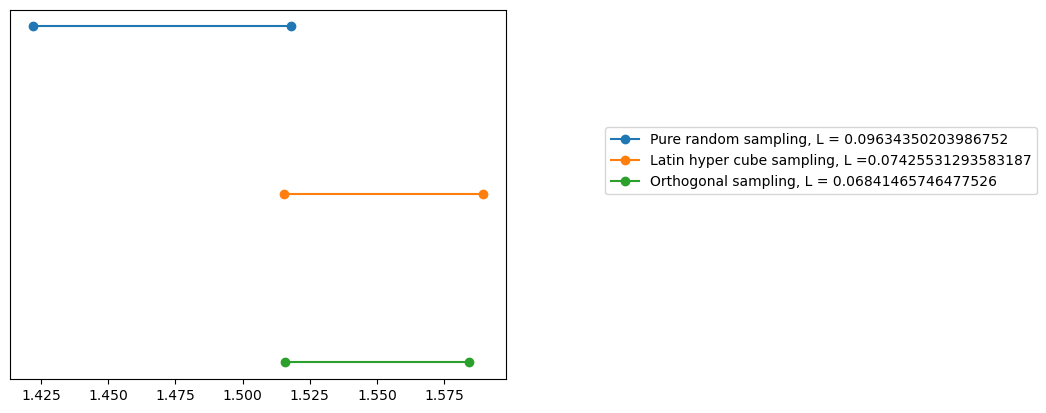

In [40]:
#Confidence intervals

print("Pure SAMPLING CI")
confidence_interval_pure = confidence_intervals(areas_pure)
length_pure = confidence_interval_pure[1] - confidence_interval_pure[0]
print(confidence_interval_pure)

print("LATIN SAMPLING CI")
confidence_interval_latin = confidence_intervals(areas_latin)
length_latin = confidence_interval_latin[1] - confidence_interval_latin[0]
print(confidence_interval_latin)

print("ORTHOGONAL SAMPLING CI")
confidence_interval_orthogonal = confidence_intervals(areas_orthogonal)
length_orthogonal = confidence_interval_orthogonal[1] - confidence_interval_orthogonal[0]
print(confidence_interval_orthogonal)

plt.plot(confidence_interval_pure,[3,3], label = "Pure random sampling, L = " +str(length_pure), marker='o')
plt.plot(confidence_interval_latin,[2,2], label = "Latin hyper cube sampling, L =" +str(length_latin), marker='o')
plt.plot(confidence_interval_orthogonal,[1,1], label = "Orthogonal sampling, L = " +str(length_orthogonal), marker='o')



plt.legend(loc=(1.2, 0.5))

plt.yticks([])  # Hide y-axis tick labels as well